# Flare 2023/06/09

In [53]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 58 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_6563_2023-06-09T17_01_07_17_01_07=0-57_corrected_export2023-07-25T11_19_08_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
head0

SIMPLE  =                    T / Written by IDL:  Thu Jun 22 12:19:40 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2783 / Number of positions along axis 1               
NAXIS2  =                 2773 / Number of positions along axis 2               
NAXIS3  =                   33 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                   58 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for hdl in io:
        print(hdl)
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[3].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstHa.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024125CF0B30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0A990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0B0E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0B830>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000024125D20260>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D20BC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D21310>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D21A60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D221B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D22900>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0B800>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0ADE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D0A7B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000024125D21C40>, <astropy.io.fits.hdu.ta

[[[[['2023-06-09T17:01:29.30791']]

   [['2023-06-09T17:01:29.69977']]

   [['2023-06-09T17:01:30.10324']]

   ...

   [['2023-06-09T17:01:41.33091']]

   [['2023-06-09T17:01:41.74363']]

   [['2023-06-09T17:01:42.12766']]]]



 [[[['2023-06-09T17:02:22.88517']]

   [['2023-06-09T17:02:23.31003']]

   [['2023-06-09T17:02:23.71341']]

   ...

   [['2023-06-09T17:02:35.03077']]

   [['2023-06-09T17:02:35.43421']]

   [['2023-06-09T17:02:35.82825']]]]



 [[[['2023-06-09T17:03:16.80461']]

   [['2023-06-09T17:03:17.16940']]

   [['2023-06-09T17:03:17.56364']]

   ...

   [['2023-06-09T17:03:28.90749']]

   [['2023-06-09T17:03:29.31092']]

   [['2023-06-09T17:03:29.70508']]]]



 ...



 [[[['2023-06-09T17:50:40.76767']]

   [['2023-06-09T17:50:41.13218']]

   [['2023-06-09T17:50:41.53544']]

   ...

   [['2023-06-09T17:50:52.70031']]

   [['2023-06-09T17:50:53.11309']]

   [['2023-06-09T17:50:53.51972']]]]



 [[[['2023-06-09T17:51:34.21372']]

   [['2023-06-09T17:51:34.63561']]

   [['20

In [5]:
pos[0][0][:,:,0,0,2][0]

array([656.0296042, 656.0546042, 656.0796042, 656.1046042, 656.1296042,
       656.1546042, 656.1796042, 656.1896042, 656.1996042, 656.2096042,
       656.2196042, 656.2296042, 656.2396042, 656.2496042, 656.2596042,
       656.2696042, 656.2796042, 656.2896042, 656.2996042, 656.3096042,
       656.3196042, 656.3296042, 656.3396042, 656.3496042, 656.3596042,
       656.3696042, 656.3796042, 656.4046042, 656.4296042, 656.4546042,
       656.4796042, 656.5046042, 656.5296042], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('19:00:37',
 array(['DATE: 2023-06-18T19:00:01', 'DATE: 2023-06-18T19:00:18',
        'DATE: 2023-06-18T19:00:37', 'DATE: 2023-06-18T19:00:55',
        'DATE: 2023-06-18T19:01:12', 'DATE: 2023-06-18T19:01:28',
        'DATE: 2023-06-18T19:01:45', 'DATE: 2023-06-18T19:02:04',
        'DATE: 2023-06-18T19:02:22', 'DATE: 2023-06-18T19:02:41',
        'DATE: 2023-06-18T19:02:57', 'DATE: 2023-06-18T19:03:14',
        'DATE: 2023-06-18T19:03:32', 'DATE: 2023-06-18T19:03:49',
        'DATE: 2023-06-18T19:04:06', 'DATE: 2023-06-18T19:04:22',
        'DATE: 2023-06-18T19:04:39', 'DATE: 2023-06-18T19:04:56',
        'DATE: 2023-06-18T19:05:14', 'DATE: 2023-06-18T19:05:32',
        'DATE: 2023-06-18T19:05:50', 'DATE: 2023-06-18T19:06:07',
        'DATE: 2023-06-18T19:06:24', 'DATE: 2023-06-18T19:06:41',
        'DATE: 2023-06-18T19:06:58', 'DATE: 2023-06-18T19:07:15',
        'DATE: 2023-06-18T19:07:31', 'DATE: 2023-06-18T19:07:48',
        'DATE: 2023-06-18T19:08:05', 'DATE: 2023-06-18T19:08:22

In [7]:
time_list = [t[17:] for t in tlist3]
time_list

['19:00:01',
 '19:00:18',
 '19:00:37',
 '19:00:55',
 '19:01:12',
 '19:01:28',
 '19:01:45',
 '19:02:04',
 '19:02:22',
 '19:02:41',
 '19:02:57',
 '19:03:14',
 '19:03:32',
 '19:03:49',
 '19:04:06',
 '19:04:22',
 '19:04:39',
 '19:04:56',
 '19:05:14',
 '19:05:32',
 '19:05:50',
 '19:06:07',
 '19:06:24',
 '19:06:41',
 '19:06:58',
 '19:07:15',
 '19:07:31',
 '19:07:48',
 '19:08:05',
 '19:08:22',
 '19:08:39',
 '19:08:55',
 '19:09:12',
 '19:09:29',
 '19:09:45',
 '19:09:58',
 '19:10:12',
 '19:10:25',
 '19:10:39',
 '19:10:52',
 '19:11:06',
 '19:11:19',
 '19:11:33',
 '19:11:46',
 '19:12:00',
 '19:12:14',
 '19:12:27',
 '19:12:40',
 '19:12:53',
 '19:13:07',
 '19:13:23',
 '19:13:40',
 '19:13:56',
 '19:14:12',
 '19:14:29',
 '19:14:45',
 '19:15:02',
 '19:15:18']

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (33, 2773, 2783)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2023-06-09/fits/nb_6563_2023-06-09T17_01_07_17_01_07=0-57_corrected_export2023-07-25T11_19_08_im.fits
s=(33, 2773, 2783)
the shape of the data is (58, '??', 33, 2773, 2783)
the wavelengths are self._wavel = array([6560.29604201, 6560.54604201, 6560.79604201, 6561.04604201,
       6561.29604201, 6561.54604201, 6561.79604201, 6561.89604201,
       6561.99604201, 6562.09604201, 6562.19604201, 6562.29604201,
       6562.39604201, 6562.49604201, 6562.59604201, 6562.69604201,
       6562.79604201, 6562.89604201, 6562.99604201, 6563.09604201,
       6563.19604201, 6563.29604201, 6563.39604201, 6563.49604201,
       6563.59604201, 6563.69604201, 6563.79604201, 6564.04604201,
       6564.29604201, 6564.54604201, 6564.79604201, 6565.04604201,
       6565.29604201])
Boundary
Blue=Outside, yellow=Inside


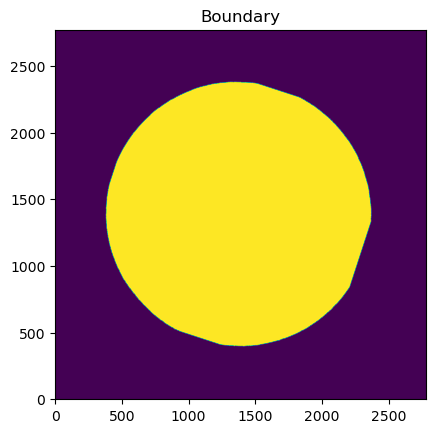

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

Ha = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='Ha23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# Ha.datacube
# np.shape(Ha.datacube), Ha.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Ha.boundary


In [11]:
# Ha.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

the mean cadence is 16.08771929824558 seconds for this line!
Ha.shape=(58, '??', 33, 2773, 2783)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[5.0, 4.125], [16.0, 4.125], [27.0, 4.125]]


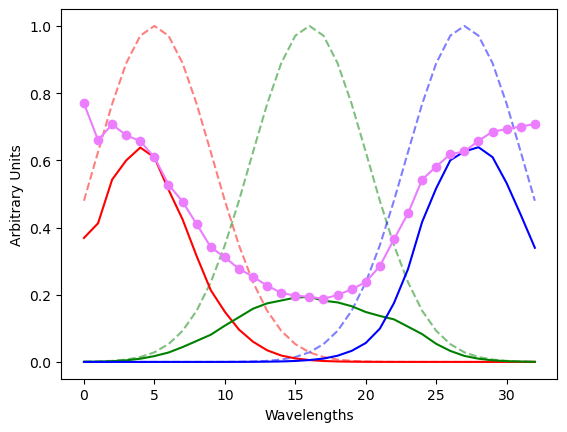

In [13]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

the number of frames is 58
frame number 0 at time 19:00:01


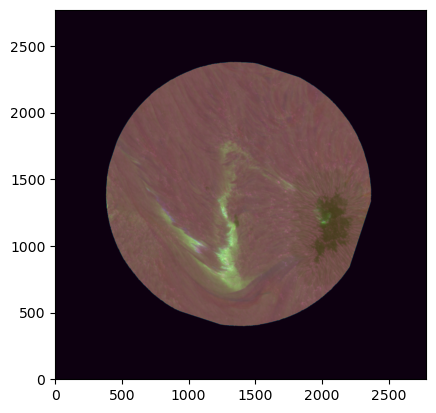

(2773, 2783, 3)
frame number 19 at time 19:05:32


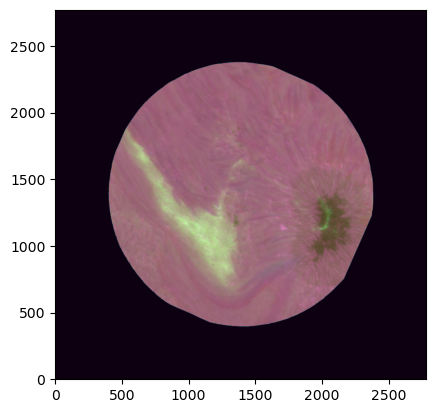

(2773, 2783, 3)
frame number 38 at time 19:10:39


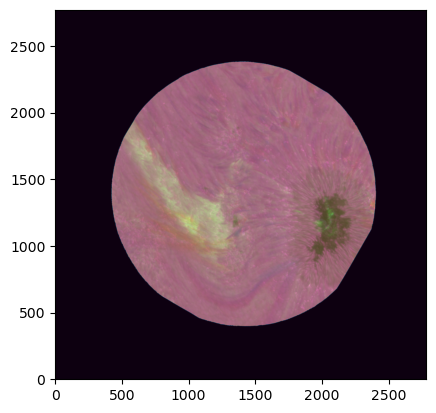

(2773, 2783, 3)
frame number 57 at time 19:15:18


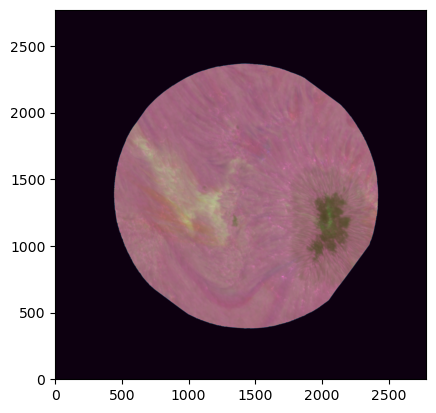

(2773, 2783, 3)


In [14]:
# %matplotlib widget
print(f'the number of frames is {Ha._number_of_frames}')
for frame in range(0 ,Ha._number_of_frames, 19):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {Ha._time[frame]}')
    plt.imshow(Ha.current_ccp, origin='lower')
    plt.imshow(Ha.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    # plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

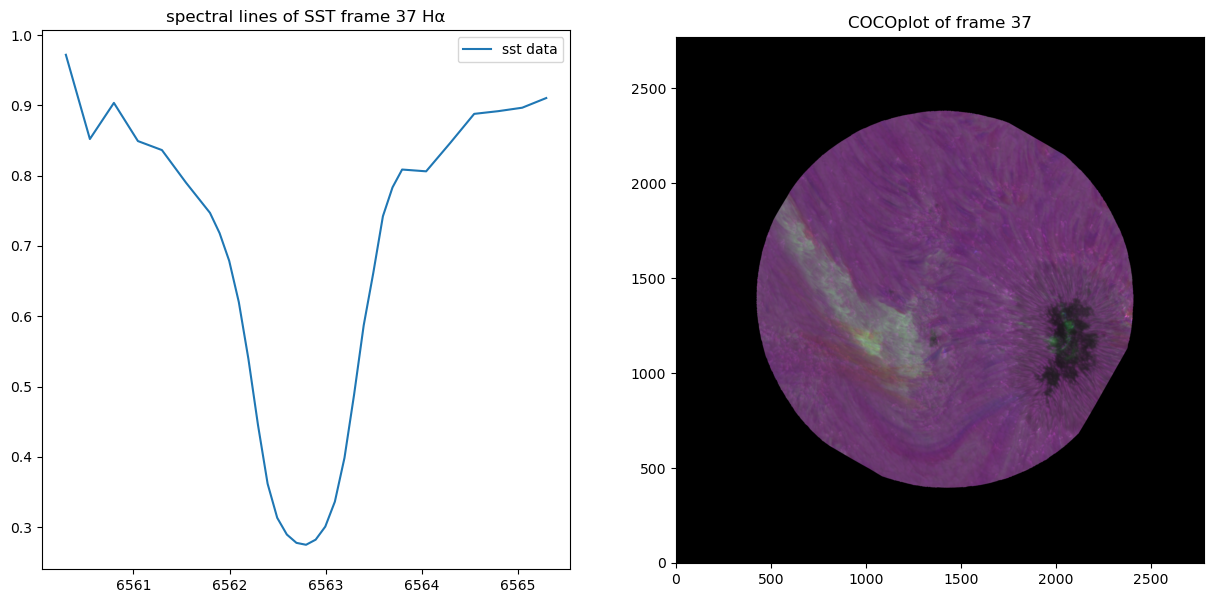

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 37
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


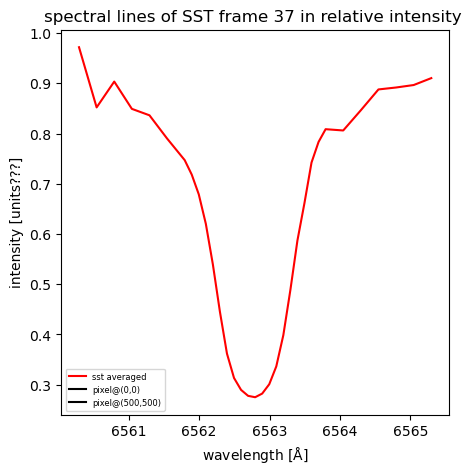

In [16]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

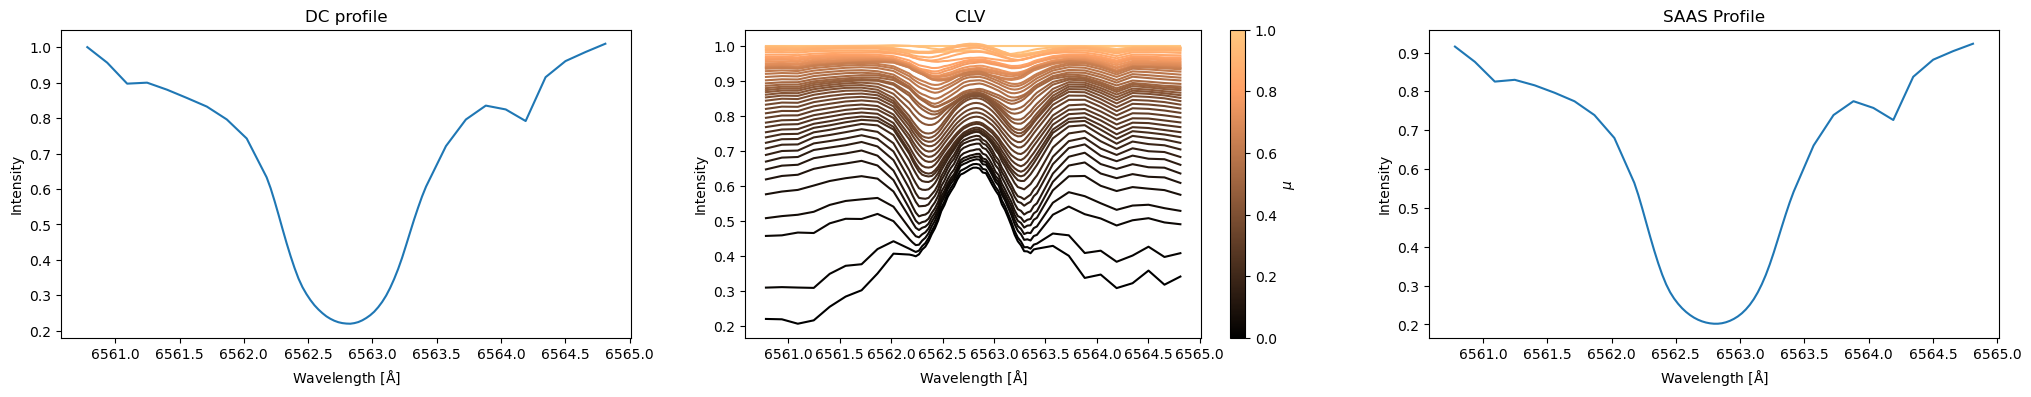

6562.797056366136 6562.797056366135


In [17]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [18]:
Ha.shape

(58, '??', 33, 2773, 2783)

In [19]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Thu Jun 22 12:19:40 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2783 / Number of positions along axis 1              
 NAXIS2  =                 2773 / Number of positions along axis 2              
 NAXIS3  =                   33 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                   58 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [20]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [21]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[29,0]

(array([[[[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70654947]],
 
          [[-674.40024091, -291.73854947],
           [-551.99224091, -291.73854947]]],
 
 
         [[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70654947]],
 
          [[-674.40024091, -291.73854947],
           [-551.99224091, -291.73854947]]],
 
 
         [[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70654947]],
 
          [[-674.40024091, -291.73854947],
           [-551.99224091, -291.73854947]]],
 
 
         ...,
 
 
         [[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70654947]],
 
          [[-674.40024091, -291.73854947],
           [-551.99224091, -291.73854947]]],
 
 
         [[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70654947]],
 
          [[-674.40024091, -291.73854947],
           [-551.99224091, -291.73854947]]],
 
 
         [[[-674.40024091, -413.70654947],
           [-551.99224091, -413.70

width = 180.57
[-659.51989285, -537.11189285, -413.92528588, -291.95728588]


does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6886387614874754 for timeframe 10
Coundourplot succesfully saved.


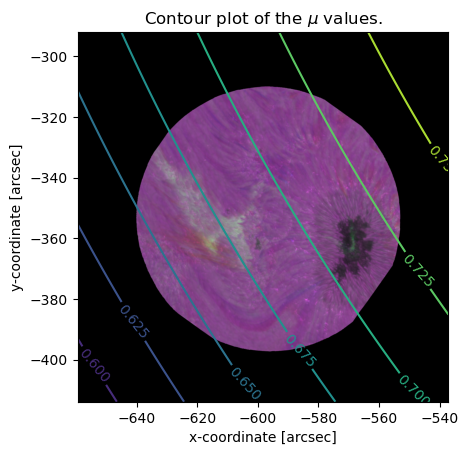

In [55]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(Ha.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)



fxp = [-659.51989285, -537.11189285 ]
fyp = [-413.92528588, -291.95728588 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=10)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


(278, 279) (278, 279) (277, 278)


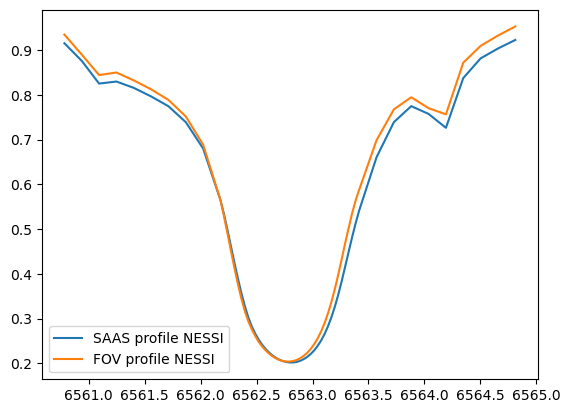

In [23]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [24]:
frame, Ha.shape

(37, (58, '??', 33, 2773, 2783))

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1456\2466189771.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
E:\solar flares/data/2017-09-06\use_nessi3.py:1076: RuntimeWarning: Mean of empty slice
  np.array([np.nanmean(self.datacube(frame)[i,ymin:ymax,xmin:xmax]) for i in range(len(self._wavel))]) / self.scalar + corr


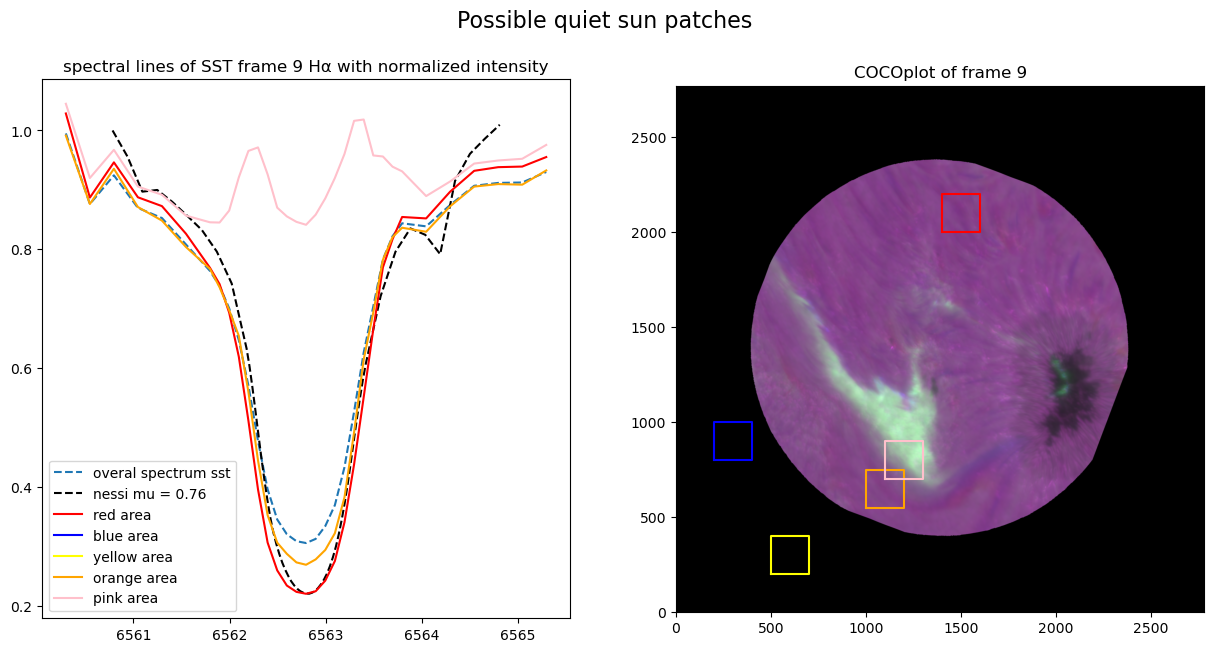

In [25]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1400,1600),(2000,2200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [26]:
color_wanted_patch = 'red'

the edges of the patch are denoted by the xlim: (1400, 1600) and ylim: (2000, 2200)


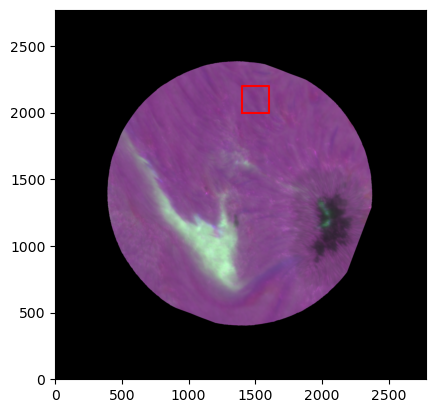

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (2000, 2200), 'color': 'red'}

In [27]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

The quiet sun is pick at x (-593.54189285, -321.54728588) with average              mu 0.710752535686981


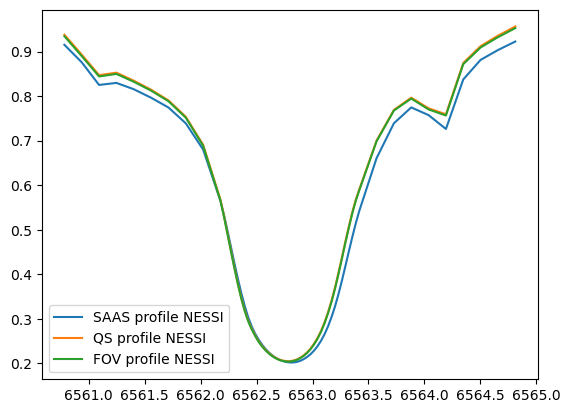

In [28]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


[6560.29604201 6560.54604201 6560.79604201 6561.04604201 6561.29604201
 6561.54604201 6561.79604201 6561.89604201 6561.99604201 6562.09604201
 6562.19604201 6562.29604201 6562.39604201 6562.49604201 6562.59604201
 6562.69604201 6562.79604201 6562.89604201 6562.99604201 6563.09604201
 6563.19604201 6563.29604201 6563.39604201 6563.49604201 6563.59604201
 6563.69604201 6563.79604201 6564.04604201 6564.29604201 6564.54604201
 6564.79604201 6565.04604201 6565.29604201] [1.02860928 0.88699591 0.94628155 0.88747489 0.87263173 0.82617146
 0.76874137 0.74127561 0.69320184 0.61923999 0.51146024 0.39561471
 0.3061671  0.25934744 0.23384599 0.22320063 0.21998954 0.22426005
 0.24209896 0.27510354 0.340368   0.43792084 0.55105817 0.66559404
 0.76957607 0.81680858 0.85432059 0.85193229 0.89698285 0.93204856
 0.93820524 0.93921733 0.95522302] [1.07844787 1.00614976 0.93385166 0.86080509 0.84695762 0.81586124
 0.77053191 0.74188276 0.70117584 0.63172121 0.54535726 0.42208623
 0.31722068 0.25883401 0.2

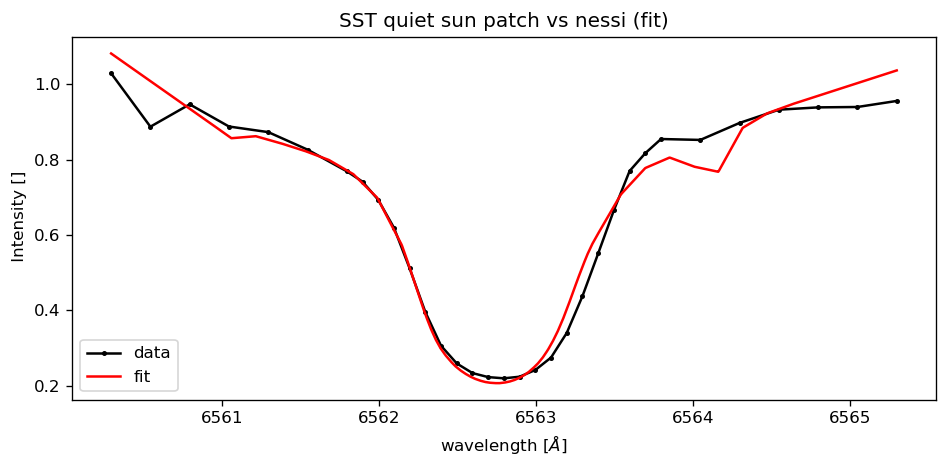

de p-waarde is  3.0266245848316214e-05 
Chi^2 reduced= 73.03176962224376 
aantal vrijheidgraden= 31 
chi^2= 2263.9848582895565
we behouden de fit tot op een betrouwbaarheidsniveau van  3.0266245848316214e-05 
Oftewel verwerp als p-waarde <lpha-niveau 


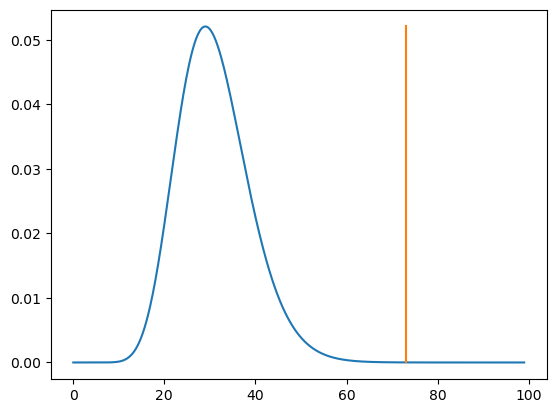

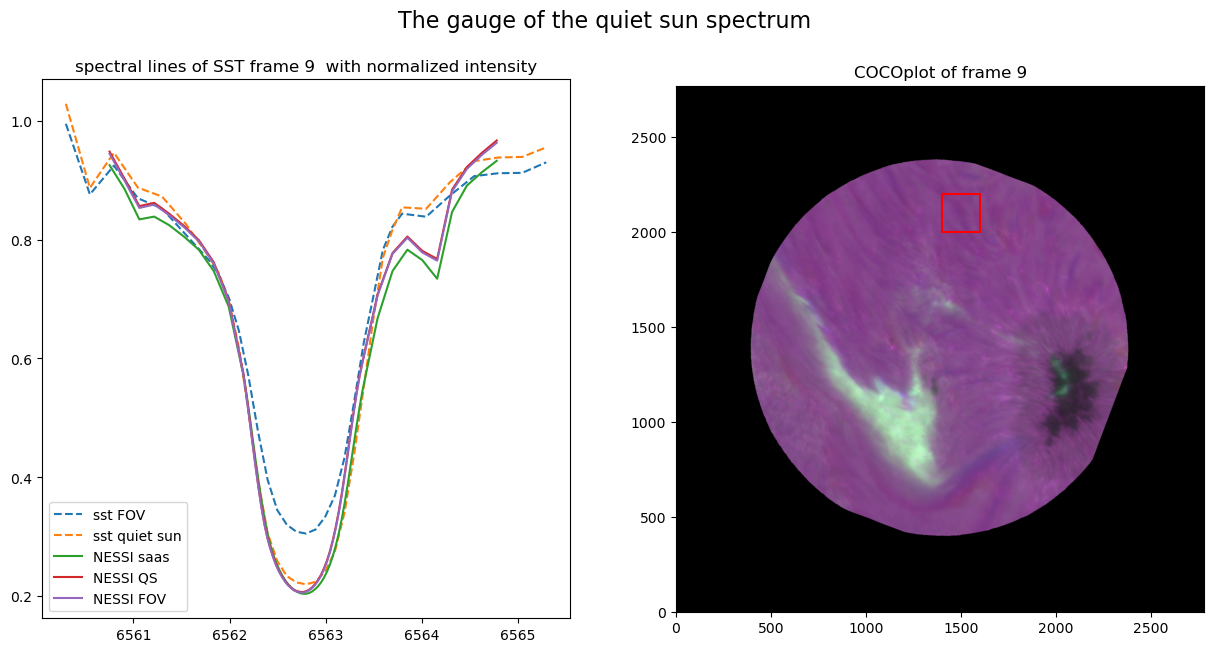

In [29]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [30]:
sst_data = Ha
Ha.shape

(58, '??', 33, 2773, 2783)

In [31]:
Ha.calculate__FOV_spect_over_time()

In total 58 frames.
Now calculating frame:
57

In [32]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (2000, 2200), 'color': 'red'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [6] at time ['t=19:01:45 UT'].
The areafactor for THIS flare is 0.00205464666199752 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 165.12%.


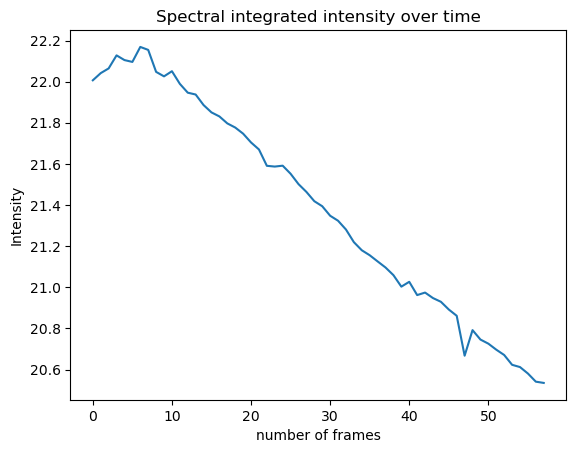

In [33]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

In [51]:
import use_nessi as un1
def Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False):
    filename = f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4'
    import matplotlib.animation as animation

    if os.path.isfile(filename):
        print(f"The filename {filename} already exist")
        return

    #params
    frame = 0
    fps = 6
    nSeconds = 5
    theta = sst_data.theta_nessi_to_quiet_sun
    theta[1] = theta[2]

    f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_qs 
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_fov 
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.saas_profile 
                                    , kind='linear', fill_value="extrapolate")


    wav = un.merge_wavelengths(sst_data._wavel - theta[0], theor_line.sst_wav)
    if "CaK" in name_of_line:
        wav = wav[:-1]



    limit = un1.derive_intensity_lim(sst_data, 
                                    mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
                                    maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])

    def frame_visualization(sst_data, frame, theta):
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8), gridspec_kw={"width_ratios":[1,1]})

        sst_data.ccp_frame(frame,Show=False)
        a=sst_data.current_ccp

        ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
        sst_data.frame_integrated_spect(frame)
        if 'CaK' in name_of_line:
            line_sst, = ax[0].plot(sst_data._wavel[:-1]-theta[0], sst_data.av_spect[:-1], '--', label='sst data') 
        else:
            line_sst, = ax[0].plot(sst_data._wavel-theta[0], sst_data.av_spect, '--', label='sst data')
        ax[0].plot(wav , f_nessi_fov(theta)(wav), label='nessi FOV')
        ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
        ax[0].legend()

        ax[0].set_ylim(limit)

        im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
        if show_boundary:
            ax[1].imshow(Image.fromarray(sst_data.boundary[::-1,:]), alpha=0.3)
        ax[1].set_title("COCOplot")
        text = ax[1].text(
            -300,
            -20,
            f"frame: {frame}, {un1.time_hulp(sst_data.TIME[frame])}",
            fontsize=12,
            color='red',
        )
        print(
            f"frame: {frame}, {sst_data._time[frame]}, total number of frames: {sst_data._number_of_frames} "
        )

        plt.show()

        return fig, line_sst,  im, text




    fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

    # animation function.  This is called sequentially
    def animate(i):
        # step of number of frames. How to step through the frames, at which rate.
        frame = step * i

        x = sst_data._wavel-theta[0]
        y = sst_data.frame_integrated_spect(frame)
        # f_sst2 = interp1d(sst_data._wavel-theta[0], y, kind='linear', fill_value="extrapolate")
        line_sst.set_data(x, y)

        print(frame, end=" ")


        text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[:8]}")
        # text = ax[1].text(
        #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
        # )    
        sst_data.ccp_frame(frame,Show=False)
        a = sst_data.current_ccp
        im.set_array(Image.fromarray(a[::-1,:]))
        return line_sst, [im], text


    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate,
                                frames=(sst_data._number_of_frames-1) // step, interval=500) 

    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    anim.save(filename, fps=fps) # , extra_args=['-vcodec', 'libx264']


    
    print("We are exiting this kernel")
    


frame: 0, 19:00:01, total number of frames: 58 


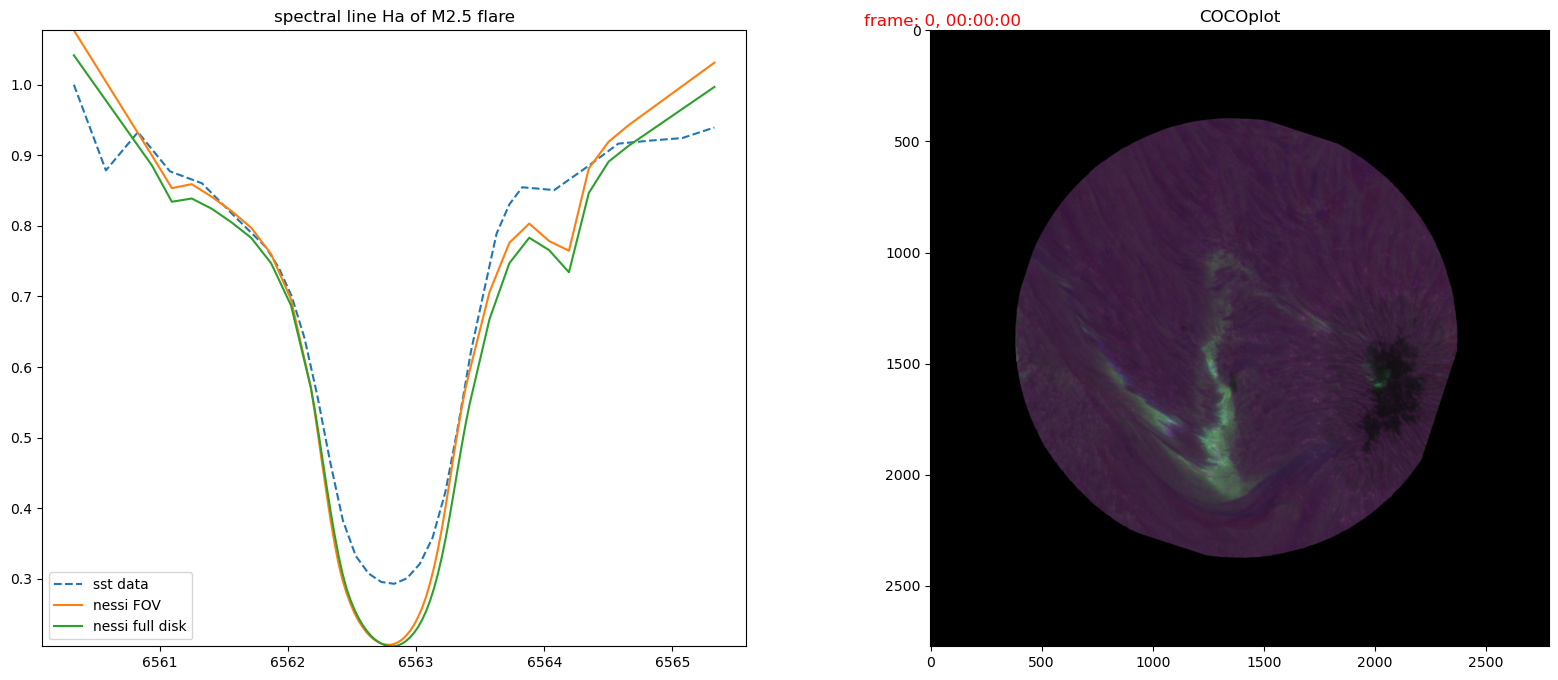

0 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 We are exiting this kernel


In [54]:
# fill in here all arguments
theor_line = theor_line
sst_data = Ha
name_of_flare = "M2.5"
name_of_line = "Ha"

Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=True)

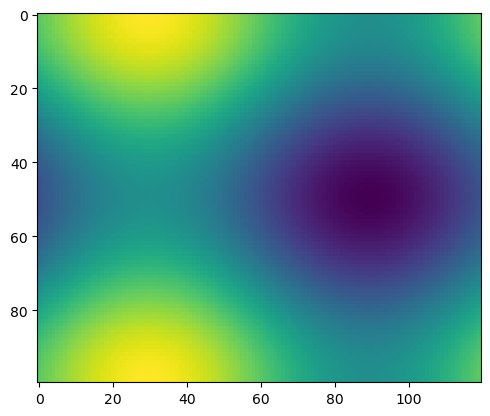

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib.animation as animation

# fig, ax = plt.subplots()


# def f(x, y):
#     return np.sin(x) + np.cos(y)

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# # ims is a list of lists, each row is a list of artists to draw in the
# # current frame; here we are just animating one artist, the image, in
# # each frame
# ims = []
# for i in range(60):
#     x += np.pi / 15
#     y += np.pi / 30
#     im = ax.imshow(f(x, y), animated=True)
#     if i == 0:
#         ax.imshow(f(x, y))  # show an initial one first
#     ims.append([im])

# ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
#                                 repeat_delay=1000)

# # To save the animation, use e.g.
# #
# ani.save("movie.mp4")
# #
# # or

# # writer = animation.FFMpegWriter(
# #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# # ani.save("movie.mp4", writer=writer)

# plt.show()